
# Matriz de confusión con scikitlearn

Consideremos el siguiente ejemplo tomado del texto   [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/) by Andreas C. Müller & Sarah Guido

<Figure size 640x480 with 0 Axes>

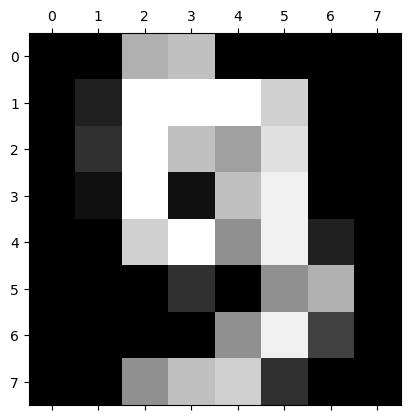

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
import numpy as np

digits = load_digits() #https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits


plt.gray()
plt.matshow(digits.images[9])
plt.show()

In [2]:
y = digits.target == 9  #
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0) #

In [20]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train) #
pred_most_frequent = dummy_majority.predict(X_test)
print("predicted labels: %s" % np.unique(pred_most_frequent))
print("score: %f" % dummy_majority.score(X_test, y_test))

dummy = DummyClassifier().fit(X_train, y_train) #
pred_dummy = dummy.predict(X_test)
print("dummy score: %f" % dummy.score(X_test, y_test))

logreg = LogisticRegression(C=0.001).fit(X_train, y_train)  #
pred_logreg = logreg.predict(X_test)
print("logreg score: %f" % logreg.score(X_test, y_test))

predicted labels: [False]
score: 0.895556
dummy score: 0.895556
logreg score: 0.973333


In [4]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[402   1]
 [  6  41]]


In [8]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Logistic Regression
[[402   1]
 [  6  41]]


In [9]:
from sklearn.metrics import f1_score
print("f1 score most frequent: %.2f" % f1_score(y_test, pred_most_frequent))
print("f1 score dummy: %.2f" % f1_score(y_test, pred_dummy))
print("f1 score logreg: %.2f" % f1_score(y_test, pred_logreg))

f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score logreg: 0.92


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent,
 target_names=["not nine", "nine"],zero_division=0))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [16]:
print(classification_report(y_test, pred_dummy,
 target_names=["not nine", "nine"],zero_division=0))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [17]:
print(classification_report(y_test, pred_logreg,
 target_names=["not nine", "nine"],zero_division=0))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450

